In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

# Set the theme style to dark background
plt.style.use("dark_background")

#### Some of available theme styles  in matplotlib: 

1. seaborn-dark
2. seaborn-darkgrid
3. seaborn-ticks
4. fivethirtyeight
5. seaborn-whitegrid
6. classic
7. seaborn-colorblind
8. seaborn-bright
9. seaborn-poster
10 ggplot
11. fast
12. seaborn-notebook
13. seaborn-muted
14. seaborn-dark-palette
15. seaborn-talk
16. seaborn
17. dark_background
18. bmh


In [81]:
# Define the parameters
ma_1 = 30
ma_2 = 100

In [124]:
# Set the date range from the current date and the previous  3 years.
start_date = dt.datetime.now() - dt.timedelta(days=365 * 3)
end_date = dt.datetime.now()

#Define a stock  symbol for use
ticker = 'CSCO'


In [125]:
# Download the data
data = yf.download(ticker, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


In [103]:
# data.to_csv('data2.csv', index=True)


In [126]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-14,52.930000,53.220001,52.599998,52.900002,48.314728,14789400
2021-05-17,52.759998,53.150002,52.680000,52.939999,48.351254,15731000
2021-05-18,52.799999,53.340000,52.740002,52.930000,48.342125,20177200
2021-05-19,51.880001,52.660000,51.860001,52.470001,47.921997,29187900
2021-05-20,50.410000,52.970001,50.099998,52.849998,48.269058,48830800
...,...,...,...,...,...,...
2024-05-06,47.220001,47.439999,46.970001,47.110001,47.110001,14163000
2024-05-07,47.209999,47.459999,47.009998,47.279999,47.279999,14308200
2024-05-08,47.439999,48.139999,47.250000,48.000000,48.000000,15130200


In [127]:
# Compute the Simple Moving Averages (SMAs)
data[f'SMA_{ma_1}'] = data['Adj Close'].rolling(window=ma_1).mean()
data[f'SMA_{ma_2}'] = data['Adj Close'].rolling(window=ma_2).mean()

# select rows from index ma_2 onwards from the  DataFrame .
data2 = data.iloc[ma_2:]


In [128]:
data2

,Open,High,Low,Close,Adj Close,Volume,SMA_30,SMA_100
Date,,,,,,,,
2021-10-06,54.349998,54.380001,52.980000,53.939999,49.943172,26339200,52.615746,50.604709
2021-10-07,54.490002,55.410000,54.349998,55.020000,50.943157,14725500,52.494398,50.630628
2021-10-08,55.200001,55.299999,54.750000,55.080002,50.998699,9255500,52.379501,50.657194
2021-10-11,55.250000,55.380001,54.900002,54.930000,50.859821,8117600,52.265493,50.686572
2021-10-12,54.990002,55.060001,54.070000,54.279999,50.257984,14241900,52.128051,50.706461
...,...,...,...,...,...,...,...,...
2024-05-06,47.220001,47.439999,46.970001,47.110001,47.110001,14163000,48.351419,49.114579
2024-05-07,47.209999,47.459999,47.009998,47.279999,47.279999,14308200,48.284839,49.101854
2024-05-08,47.439999,48.139999,47.250000,48.000000,48.000000,15130200,48.246557,49.092787


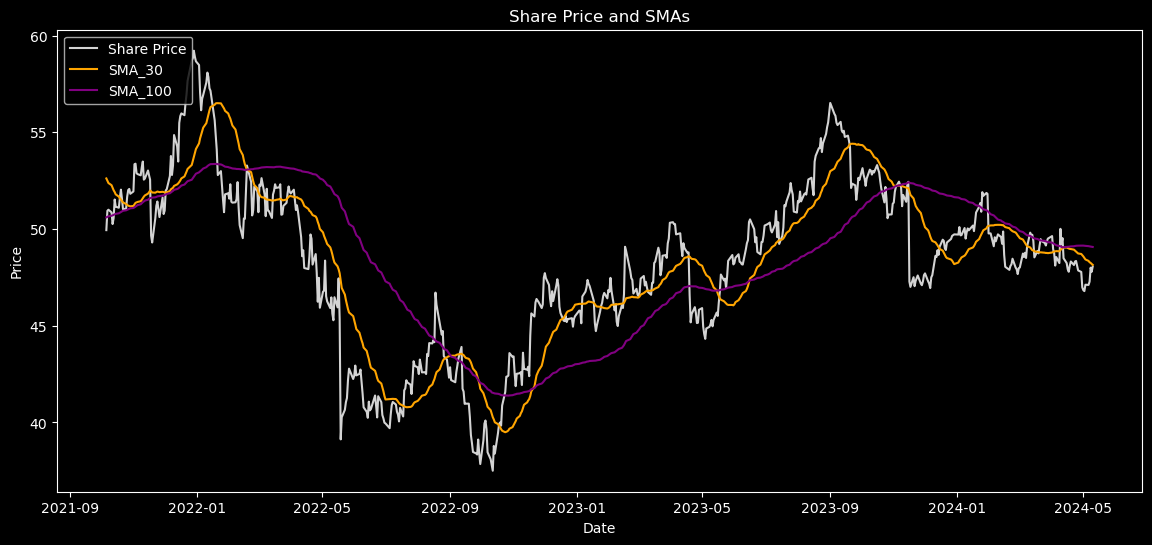

In [129]:
# Plot the data along with SMAs 
plt.figure(figsize=(14, 6))
plt.plot(data2['Adj Close'], label='Share Price', color="lightgray")
plt.plot(data2[f'SMA_{ma_1}'], label=f'SMA_{ma_1}', color="orange")
plt.plot(data2[f'SMA_{ma_2}'], label=f'SMA_{ma_2}', color="purple")
plt.legend(loc='upper left')
plt.title('Share Price and SMAs')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [130]:
# Initialize lists for buy and sell signals
buy_signals = []
sell_signals = []
trigger = 0


In [131]:
# Generate buy and sell signals based on SMA crossover strategy
for X in range(len(data2)):
    # Buy signal => If SMA_30 crosses above SMA_100 and trigger is not set to 1
    if data2[f'SMA_{ma_1}'].iloc[X] > data2[f'SMA_{ma_2}'].iloc[X] and trigger != 1:
        buy_signals.append(data2['Adj Close'].iloc[X]) # Append Adj Close price as buy signal
        sell_signals.append(float('nan')) # Append NaN for sell signal
        # Set trigger to 1 indicating buy signal
        trigger = 1 
    # Sell signal => If SMA_30 crosses below SMA_100 and trigger is not set to -1
    elif data2[f'SMA_{ma_1}'].iloc[X] < data2[f'SMA_{ma_2}'].iloc[X] and trigger != -1:
        buy_signals.append(float('nan')) # Append NaN for buy signal
        sell_signals.append(data2['Adj Close'].iloc[X]) # Append Adj Close price as sell signal
        # Set trigger to -1 indicating sell signal
        trigger = -1
    # No signal => If neither buy nor sell condition is met
    else:
        buy_signals.append(float('nan')) # Append NaN for buy signal
        sell_signals.append(float('nan')) # Append NaN for sell signal
        
            

In [132]:
len(buy_signals)

653

In [133]:
# Add buy and sell signals to the DataFrame
data2.loc[:, 'Buy Signals'] = buy_signals
data2.loc[:, 'Sell Signals'] = sell_signals


C:\Users\joshu\AppData\Local\Temp\ipykernel_11608\142544583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.loc[:, 'Buy Signals'] = buy_signals
C:\Users\joshu\AppData\Local\Temp\ipykernel_11608\142544583.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.loc[:, 'Sell Signals'] = sell_signals


In [134]:
# data2.to_csv('datatwo.csv', index= True)

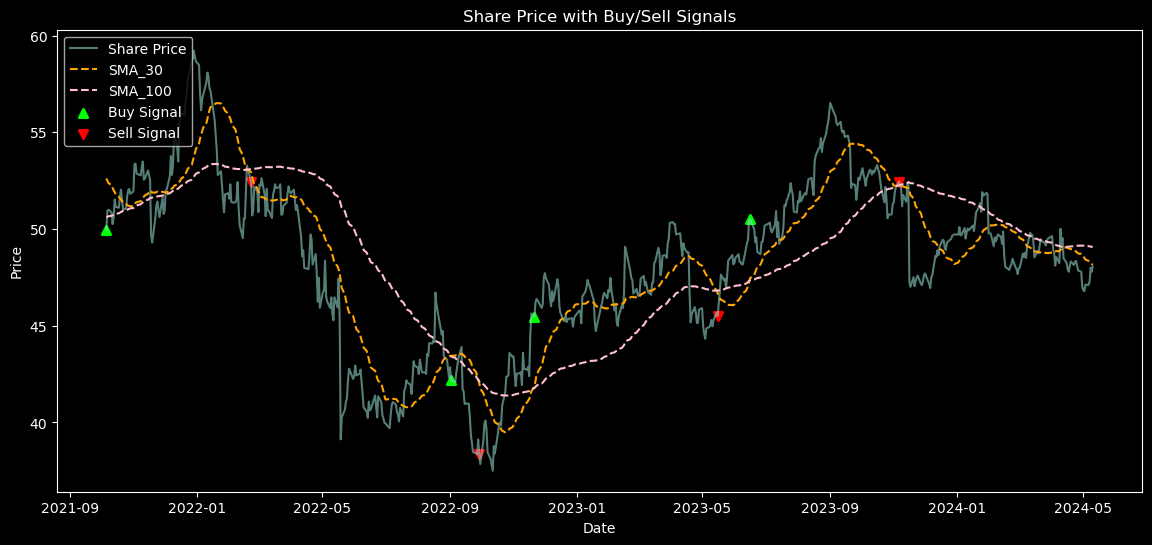

In [135]:
# Plot the data with buy and sell signals
plt.figure(figsize=(14, 6))
plt.plot(data2['Adj Close'], label='Share Price', alpha=0.6)
plt.plot(data2[f'SMA_{ma_1}'],label=f'SMA_{ma_1}', color='orange', linestyle='--')
plt.plot(data2[f'SMA_{ma_2}'],label=f'SMA_{ma_2}', color='pink', linestyle='--')
plt.scatter(data2.index, data2['Buy Signals'], label='Buy Signal',  marker='^' , color='#00ff00', lw=2)
plt.scatter(data2.index, data2['Sell Signals'], label='Sell Signal',  marker='v' , color='#ff0000', lw=2)
plt.legend(loc='upper left')
plt.title('Share Price with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
            